# MUSHROOM CLASSIFICATION TASK - iNEURON

### The Audubon Society Field Guide to North American Mushrooms contains descriptions
### of hypothetical samples corresponding to 23 species of gilled mushrooms in the
### Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either
### definitely edible, definitely poisonous, or maybe edible but not recommended. This last
### category was merged with the toxic category. The Guide asserts unequivocally that
### there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it
### be" for Poisonous Oak and Ivy.
### The main goal is to predict which mushroom is poisonous & which is edible.

# DATASET FEATURES WITH CATEGORIES

## About this file

#### Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


# DATA GATHERING

### data was got from an open source ML repository --> [Download Dataset](https://www.kaggle.com/uciml/mushroom-classification)

In [3]:
#import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
%matplotlib inline
print('imported succesfully')

imported succesfully


## Get dataset 

In [16]:
pwd = os.getcwd() #current directory path
file_path = os.path.join(pwd, 'dataset/mushroomsTrain.csv') #join present dir to dataset file name
print(file_path)
mushroom = pd.read_csv(file_path)
df = mushroom.copy() # make copy of dataset for analysis

#read train data into dataframe
pd.pandas.set_option('display.max_columns', None)
df.head()

/home/bee_nyah/Desktop/iNeuron/mushroomClassification/dataset/mushroomsTrain.csv


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
#get the shape of the entire dataset 
print(f'{df.shape[1]} features, {df.shape[0]} instances')

23 features, 8124 instances


In [17]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [18]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# EDA

### Data analysis workflow 
    1. Find missing values  
    2. Analyse numerical & categorical 
    3. Visualize relationship btw indepenent and dependent features  

### *  Find missng Values 

In [4]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0] #list comprehension to store columns with missing values
features_na

[]

    no missing data features exists in the list

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

    from the analysis, the dataset has no missing values and it is made up of only categorical data and we have to visualize to find some relationship with target class 

In [6]:
df.columns #all feature names available in dataset

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### * Visualize data

    Find Relationships between features and target class 

<Figure size 1440x360 with 0 Axes>

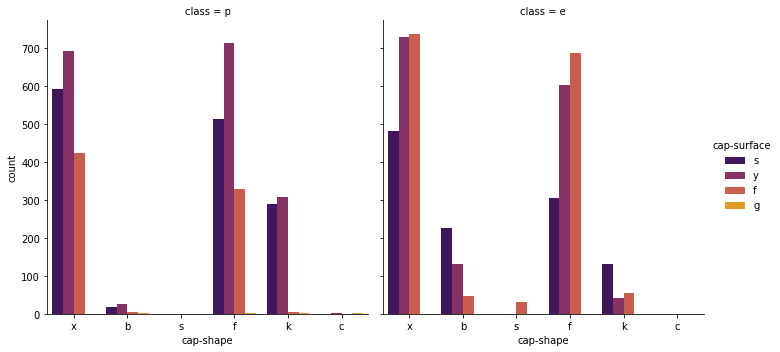

In [7]:
plt.figure(figsize=[20,5])
sns.catplot(x='cap-shape', hue='cap-surface', col='class',
                data=df, kind='count',
                palette='inferno')
plt.show()      
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s


* bell shape and smooth cap-surface mushrooms are quite edible
* Knobbed cap-shape and scaly cap-surface mushrooms are poisonous

<Figure size 1440x360 with 0 Axes>

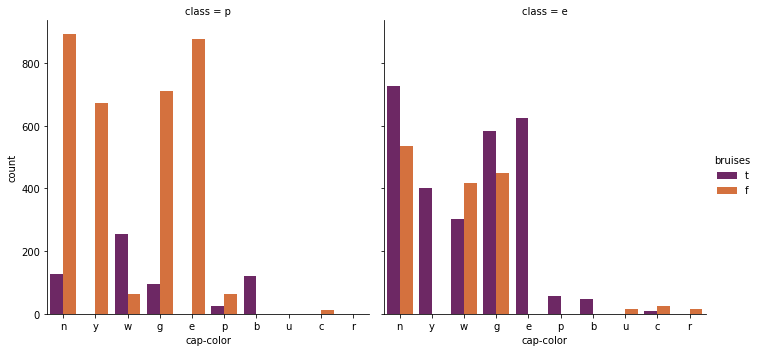

In [8]:
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

#    bruises: bruises=t,no=f
plt.figure(figsize=[20,5])
sns.catplot(x='cap-color', hue='bruises', col='class',
            data=df, kind='count', palette='inferno')
plt.show()

* White coloured odourless mushrooms are recommended as edible
*  red mushrooms and bruises are recommended as edible

<Figure size 1440x360 with 0 Axes>

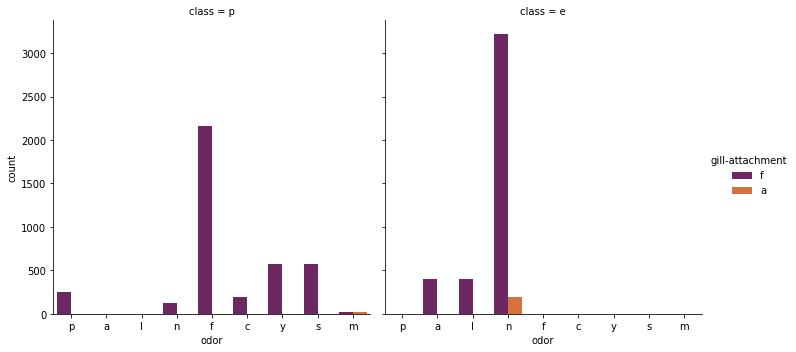

In [9]:
plt.figure(figsize=[20,5])
sns.catplot(x='odor', hue='gill-attachment', col='class',
            data=df, kind='count', palette='inferno')
plt.show()

#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

#gill-attachment: attached=a,descending=d,free=f,notched=n

* species with no odor and free are recomended to eat
* free and odour are poisonous

<Figure size 1440x360 with 0 Axes>

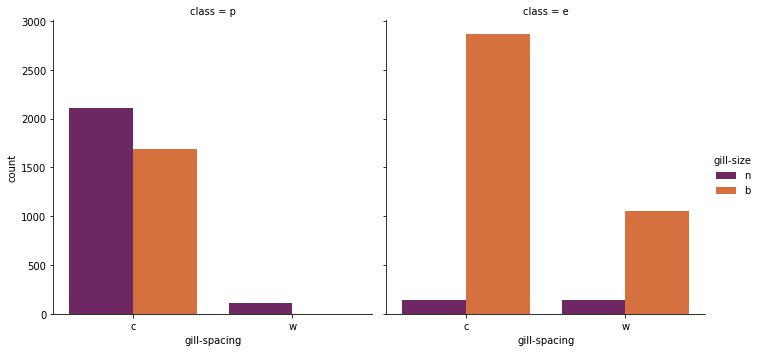

In [10]:
plt.figure(figsize=[20,5])
sns.catplot(x='gill-spacing', hue='gill-size', col='class',
            data=df, kind='count', palette='inferno')
plt.show()
#gill-spacing: close=c,crowded=w,distant=d

#gill-size: broad=b,narrow=n

* crowded gillspace and narrow gill size is edible

<Figure size 1440x360 with 0 Axes>

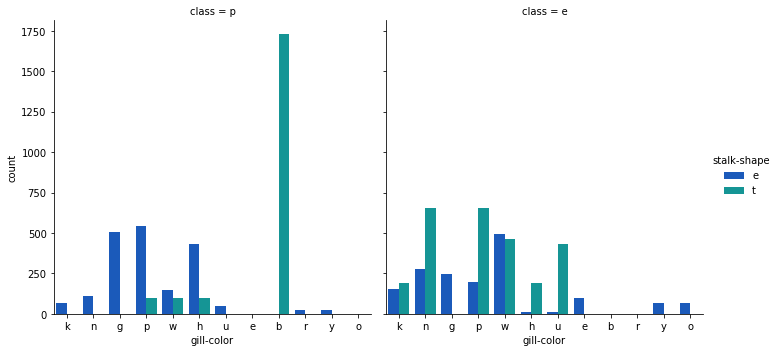

In [11]:
plt.figure(figsize=[20,5])
sns.catplot(x='gill-color', hue='stalk-shape', col='class',
            data=df, kind='count', palette='winter')
plt.show()
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

* Black gill-color and tampering stalk shape is recommended as edible
* Brown gill-color and tampering stalk shape is recommended as edible
* white gill-color and enlarging stalk shape is recommended as  edible
* purple gill-color and tampering stalk shape is recommended as  edible
* Buff gill-color and tampering stalk shape is recommended as  poisonous

<Figure size 1440x360 with 0 Axes>

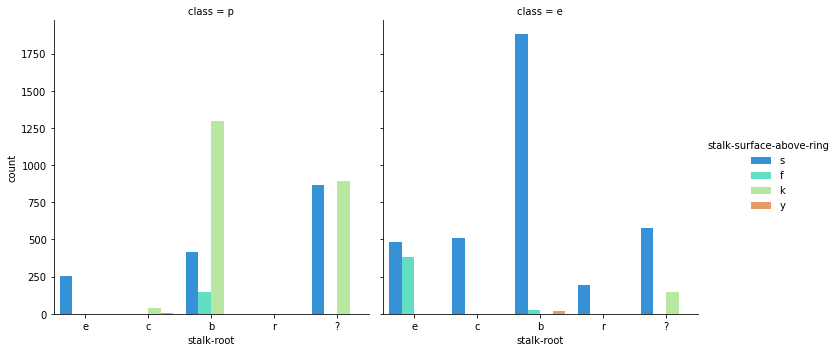

In [12]:
plt.figure(figsize=[20,5])
sns.catplot(x='stalk-root', hue='stalk-surface-above-ring', col='class',
            data=df, kind='count', palette='rainbow')
plt.show()
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* bulbous stalk-root and scaly stalk surface above ring is recommendd as edible
* buibous stalk-root and silky stalk surface above ring is poisonous

<Figure size 1440x360 with 0 Axes>

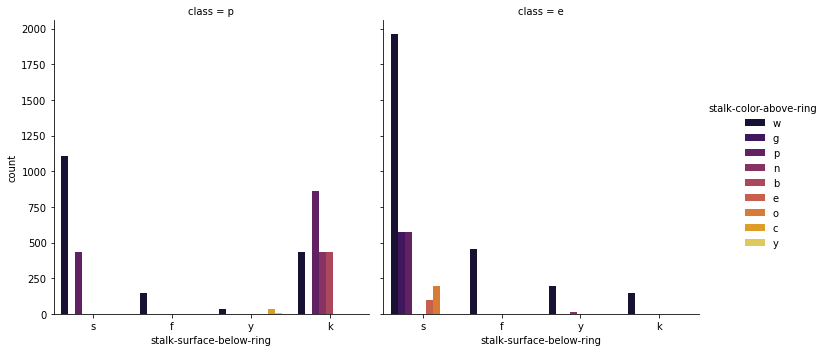

In [13]:
plt.figure(figsize=[20,5])
sns.catplot(x='stalk-surface-below-ring', hue='stalk-color-above-ring', col='class',
            data=df, kind='count', palette='inferno')
plt.show()
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* silky stalk surface below ring and pink stalk color avove ring is poisonous
* smooth stalk surface below ring and white stalk color avove ring is recommended as edible

<Figure size 1440x360 with 0 Axes>

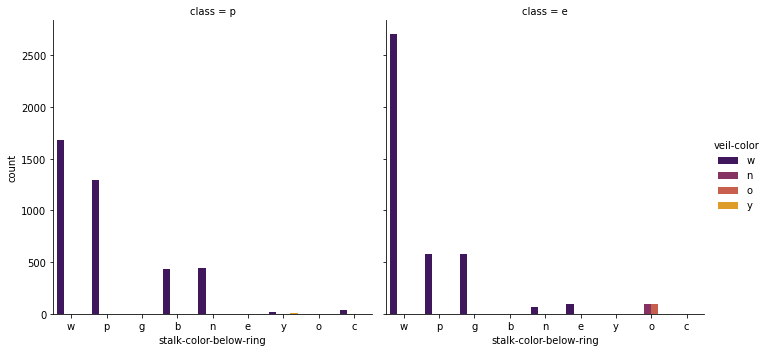

In [14]:
plt.figure(figsize=[20,5])
sns.catplot(x='stalk-color-below-ring', hue='veil-color', col='class',
            data=df, kind='count', palette='inferno')
plt.show()
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-color: brown=n,orange=o,white=w,yellow=y

* brown & buff stalk color below ring and white veil color is recommended as poisonous 

In [15]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

     veil type has only one category and does not create any impact on target variable. this will be handled in the feature engineering & selection section

<Figure size 1440x360 with 0 Axes>

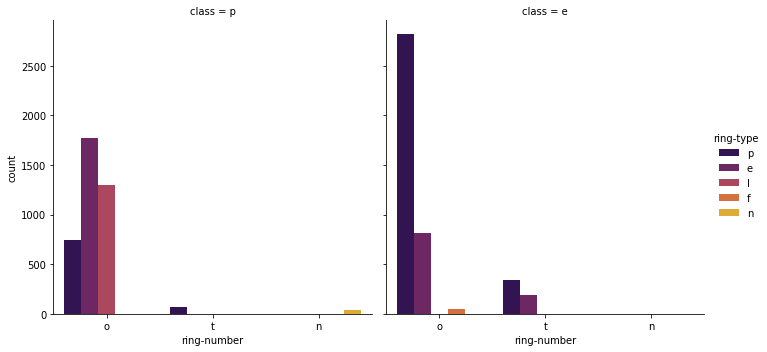

In [16]:
plt.figure(figsize=[20,5])
sns.catplot(x='ring-number', hue='ring-type', col='class',
            data=df, kind='count', palette='inferno')
plt.show()

# ring-number: none=n,one=o,two=t

# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* ring number of one and pendant ring type is recommended as edible 
* ring number of one and pendant evanescent type is recommended as poisonous
* ring number of two and pendant ting type is recommended as edible 

<Figure size 1440x360 with 0 Axes>

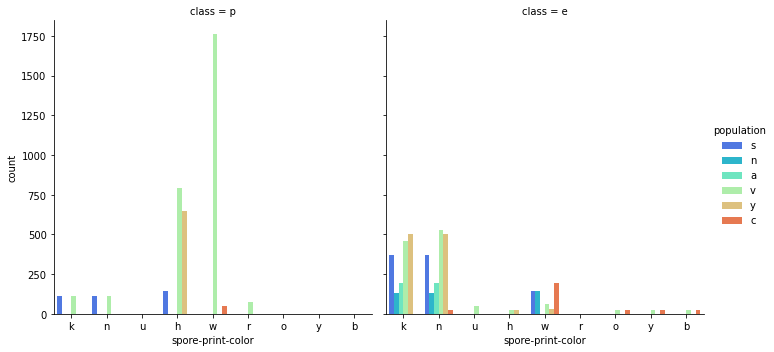

In [17]:
plt.figure(figsize=[20,5])
sns.catplot(x='spore-print-color', hue='population', col='class',
            data=df, kind='count', palette='rainbow')
plt.show()
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* black spore print color and solitary population mushrooms is recommended as edible
* brown spore print color and several population mushrooms is recommended as edible
* chocolate print color and several population mushrooms is poisonous
* white print color and several population mushrooms is poisonous

<Figure size 1440x360 with 0 Axes>

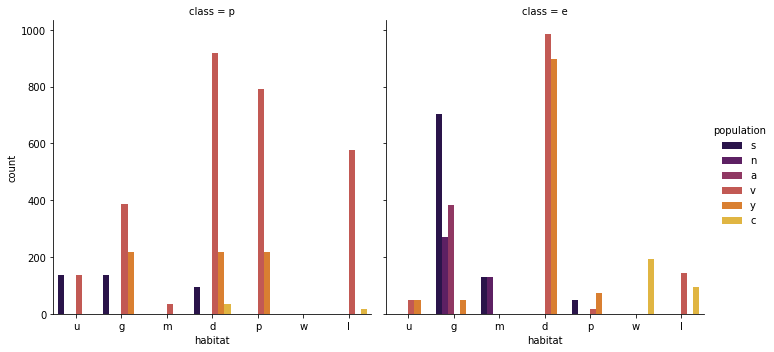

In [18]:
plt.figure(figsize=[20,5])
sns.catplot(x='habitat',hue='population', col='class',
            data=df, kind='count', palette='inferno')
plt.show()
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* mushrooms in paths habitats and several population are poisonous
* mushrooms in medows habitats and numerous & scattered population recommended as edible
* mushrooms in grass habitats and scattered population are recommended as edible

### From the analysis alot of features have several and important relationships with the target class. We used an approach of combining most features to get more insights and see sensible patterns from the data. From the anaysis we have found one feature which is of no relevance to the target class and it would be handled in the feature engineering and selection stage 

# FEATURE ENGINEERING & SELECTION

#### Preprocess Data 

In [19]:
## Enccode dataset 
from sklearn.preprocessing import LabelEncoder
mapping = list()
dict_ = dict()

def encode_feature(feature):
    feature_name = feature.name
    le = LabelEncoder()
    features = le.fit_transform(feature)
    mappings_dict = {index: label for index, label in enumerate(le.classes_)}
    mapping.append(mappings_dict)
    print(feature_name, le.classes_)
    return features
    

In [20]:
for feature in df.columns:
    df[feature] = encode_feature(df[feature]) 

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [39]:
df['ring-type'].unique()

array([4, 0, 2, 1, 3])

In [21]:
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


#### Seperate data

In [23]:
#seperate features and label
X = df.drop('class', axis=1)
y = df['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


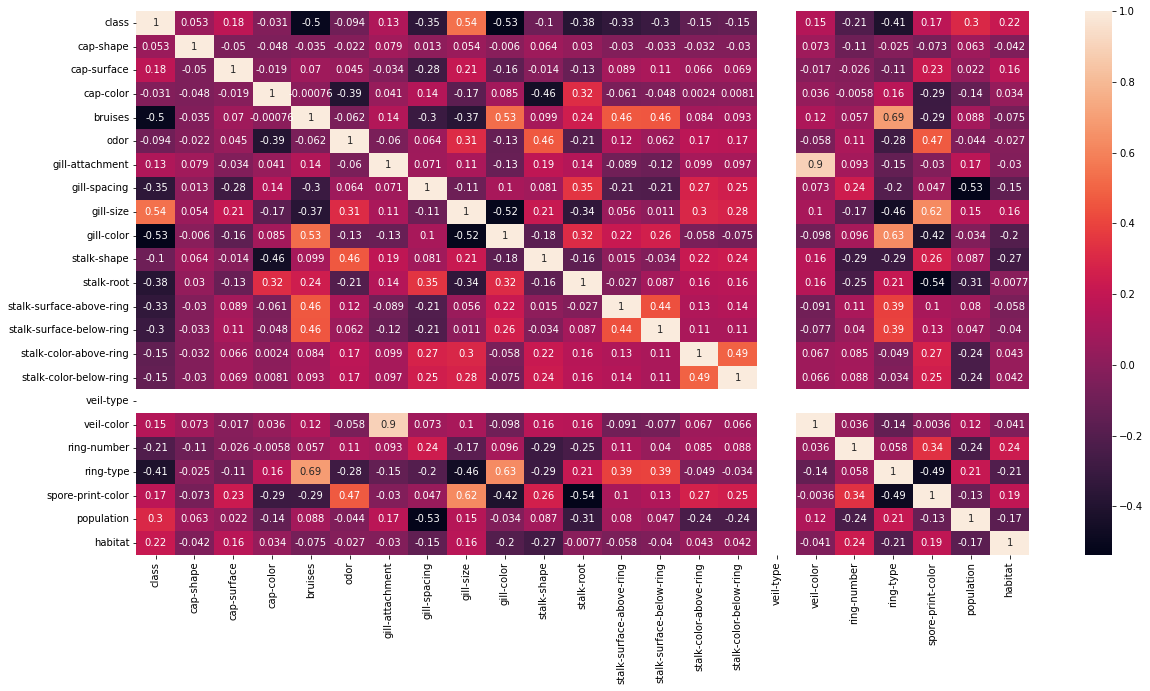

In [24]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

    * From the heatmap analysis, the veil-type feature has only one category and has no corresponding impact on the target class
    * the veil-color feature correlates highly with the gill-attachment feature at about 90%. one feature has to be selected and the other dropped
  

In [25]:
features_to_drop = ['veil-type', 'gill-attachment'] #Features droped which has no much relevance to target class

In [26]:
X = X.drop(features_to_drop, axis=1) #drop features

In [27]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

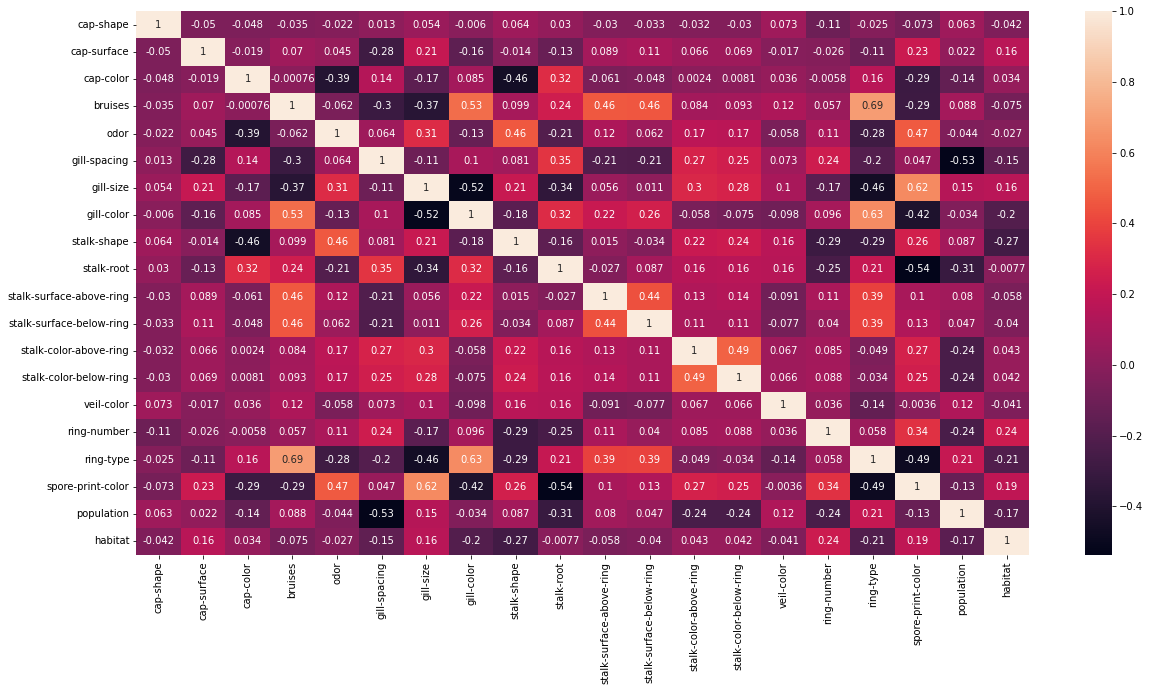

In [28]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True)
plt.show()

## Scale data 

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [30]:
## Split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train :',X_train.shape, '\n X_test :', X_test.shape)

X_train : (6499, 20) 
 X_test : (1625, 20)


## Check for imbalance rate for training in target data 

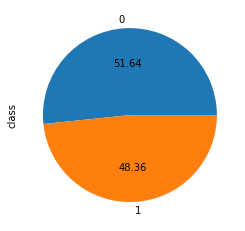

In [31]:
#for training data
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()

    The target variables are quite in a balanced range for training

# MODEL BUILDING 

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [33]:
#ML models i would use to train my data 
models = { 'kNN' : KNeighborsClassifier(),
           'SVC' : SVC(C=1.0,kernel='rbf'),
           'DecisionTreeClassifier' : DecisionTreeClassifier(),
           'RandomForestClassifier' : RandomForestClassifier(),
           'LogisticRegression'  : LogisticRegression(),
           'GaussianNB' :  GaussianNB(),
           'CatBoostClassifier' : CatBoostClassifier(),
           'LGBMClassifier' : LGBMClassifier(),
           'XGBClassifier' : XGBClassifier(),
           'MLPClassifier' : MLPClassifier(hidden_layer_sizes=(128,128)),
}

In [34]:
for name, model in models.items():
   model.fit(X_train,y_train)

   #Predictiing on Test Set
   y_pred = model.predict(X_test)

   #Evaluating model using f1_score
   print(f'{name} F1 score on validation set is : {f1_score(y_test,y_pred)}') 

/home/bee_nyah/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


kNN F1 score on validation set is : 1.0
SVC F1 score on validation set is : 1.0
DecisionTreeClassifier F1 score on validation set is : 1.0
RandomForestClassifier F1 score on validation set is : 1.0
LogisticRegression F1 score on validation set is : 0.9525666016894087
GaussianNB F1 score on validation set is : 0.9253333333333332
Learning rate set to 0.02291
0:	learn: 0.6264353	total: 83.1ms	remaining: 1m 22s
1:	learn: 0.5734063	total: 99ms	remaining: 49.4s
2:	learn: 0.5268590	total: 123ms	remaining: 41s
3:	learn: 0.4821159	total: 153ms	remaining: 38.2s
4:	learn: 0.4439071	total: 168ms	remaining: 33.3s
5:	learn: 0.4044938	total: 188ms	remaining: 31.1s
6:	learn: 0.3689240	total: 210ms	remaining: 29.8s
7:	learn: 0.3418064	total: 233ms	remaining: 28.9s
8:	learn: 0.3166699	total: 243ms	remaining: 26.8s
9:	learn: 0.2866987	total: 275ms	remaining: 27.3s
10:	learn: 0.2533577	total: 297ms	remaining: 26.7s
11:	learn: 0.2287040	total: 337ms	remaining: 27.7s
12:	learn: 0.2121794	total: 359ms	remain

/home/bee_nyah/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:11:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier F1 score on validation set is : 1.0
MLPClassifier F1 score on validation set is : 1.0


    most of the algorithms give a good score, but we will be working with the KNeighborsClassifier which gives a good accuracy score amongs others

In [35]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(f'F1 score on validation set is : {f1_score(y_test,pred)}') 

/home/bee_nyah/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


F1 score on validation set is : 1.0


In [36]:
#save model for future prediction and app deploymet
import joblib as jl
jl.dump(model,'trainedMushroomClassifier.sav')

['trainedMushroomClassifier.sav']